In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -qq "/content/drive/MyDrive/ds_study/Images.zip"

In [ ]:
ls "./Images"

Train/  Validation/


In [ ]:
ls"./Images/Train"

긴형/  둥근형/  계란형/  사각형/  역삼각형/  마름모형/


In [ ]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import random

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 3s (3,296 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib import font_manager, rc

plt.rcParams["axes.unicode_minus"] = False
rc("font", family= "NanumGothic")
%matplotlib inline

### [EDA] Train / Val 합친 데이터로 분포 확인 

In [ ]:
combined_df = pd.read_csv('/content/drive/MyDrive/ds_study/data/combined')

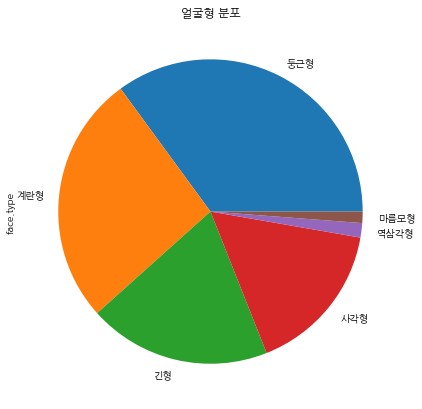

In [ ]:
def drawGraph():
    combined_df['face.type'].value_counts().plot(
        kind="pie", grid=True, title="얼굴형 분포", figsize=(7,7));
drawGraph()

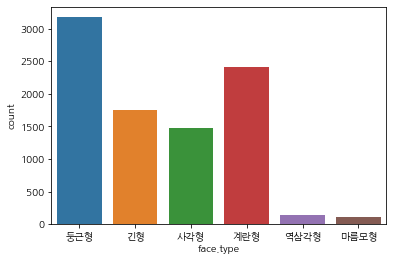

In [ ]:
sns.countplot(x= combined_df['face.type']);

#### 성별에 따라 얼굴형 분포 확인

In [ ]:
combined_gender = pd.read_csv('/content/drive/MyDrive/ds_study/data/gender_combined')
counts = pd.crosstab(combined_gender.face_type,combined_gender.gender)
counts

gender,F,M
face_type,,
계란형,1117,1297
긴형,480,1280
둥근형,1434,1749
마름모형,27,83
사각형,363,1112
역삼각형,21,118


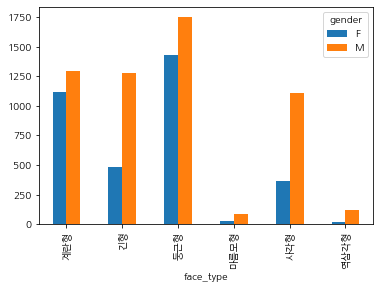

In [ ]:
counts.plot(kind='bar')
plt.show()

### Preprocessing

In [ ]:
path = '/content/Images/'
dataset = {"image_path" : [], "face_shape" : [], "where" : []} 

for where in os.listdir(path):
    for status in os.listdir(path + "/" + where):
        for image in glob.glob(path + where + '/'+status + '/' + '*.png'):
            dataset['image_path'].append(image)
            dataset['face_shape'].append(status)
            dataset['where'].append(where)

In [ ]:
dataset = pd.DataFrame(dataset)
dataset.tail()

,image_path,face_shape,where
9076,/content/Images/Validation/마름모형/12263.png,마름모형,Validation
9077,/content/Images/Validation/마름모형/3519.png,마름모형,Validation
9078,/content/Images/Validation/마름모형/8507.png,마름모형,Validation
9079,/content/Images/Validation/마름모형/12326.png,마름모형,Validation
9080,/content/Images/Validation/마름모형/3401.png,마름모형,Validation


#### 잘 들어왔는지 갯수 확인

In [ ]:
train_df = dataset[dataset['where'] == 'Train']
valid_df = dataset[dataset['where'] == 'Validation']
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)

In [ ]:
print(len(train_df))
print(len(valid_df))

8071
1010


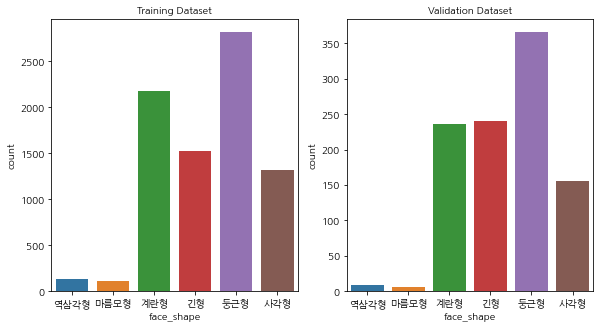

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x=train_df['face_shape'])
plt.title("Training Dataset", size=10)

plt.subplot(1, 3, 2)
sns.countplot(x=valid_df['face_shape'])
plt.title("Validation Dataset", size=10)

plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
tr_path ='/content/Images/Train'
val_path = '/content/Images/Validation'

In [ ]:
Gen = ImageDataGenerator(rescale=1./255)
train_dataset = Gen.flow_from_directory(tr_path,target_size=(130,180),batch_size=10, class_mode = 'categorical')
val_dataset = Gen.flow_from_directory(val_path,target_size=(130,180),batch_size=10, class_mode = 'categorical')

Found 8071 images belonging to 6 classes.
Found 1010 images belonging to 6 classes.


In [ ]:
train_dataset.class_indices

{'계란형': 0, '긴형': 1, '둥근형': 2, '마름모형': 3, '사각형': 4, '역삼각형': 5}

In [ ]:
CLASS = ['계란형','긴형','둥근형','마름모형','사각형','역삼각형']

In [ ]:
model4 = models.Sequential([
                        Conv2D(64, kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', input_shape=[130,180,3]),
                        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
                        Conv2D(128, (3, 3), activation='relu', padding='same'),
                        MaxPooling2D(pool_size=(2, 2)),
                        Conv2D(256, (3, 3), activation='relu', padding='same'),                        
                        MaxPooling2D(pool_size=(2, 2)),
                        Conv2D(512, (3, 3), activation='relu', padding='same'),
                        MaxPooling2D(pool_size=(2, 2)),  
                        Dropout(0.1),                       
                        Flatten(),
                        Dense(256, activation='relu'),                      
                        Dense(6, activation='softmax')
                   ])

In [ ]:
model4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history5 = model4.fit(train_dataset,epochs=10,validation_data=val_dataset)

Epoch 1/10
808/808 [==============================] - 66s 79ms/step - loss: 1.4546 - accuracy: 0.3417 - val_loss: 1.4174 - val_accuracy: 0.3564
Epoch 2/10
808/808 [==============================] - 62s 77ms/step - loss: 1.3892 - accuracy: 0.3883 - val_loss: 1.3138 - val_accuracy: 0.4139
Epoch 3/10
808/808 [==============================] - 64s 79ms/step - loss: 1.2946 - accuracy: 0.4535 - val_loss: 1.2197 - val_accuracy: 0.4574
Epoch 4/10
808/808 [==============================] - 61s 75ms/step - loss: 1.2492 - accuracy: 0.4790 - val_loss: 1.1984 - val_accuracy: 0.4663
Epoch 5/10
808/808 [==============================] - 59s 73ms/step - loss: 1.2144 - accuracy: 0.4928 - val_loss: 1.1780 - val_accuracy: 0.4980
Epoch 6/10
808/808 [==============================] - 61s 76ms/step - loss: 1.1926 - accuracy: 0.5121 - val_loss: 1.1806 - val_accuracy: 0.4881
Epoch 7/10
808/808 [==============================] - 59s 73ms/step - loss: 1.1668 - accuracy: 0.5143 - val_loss: 1.1856 - val_accuracy:

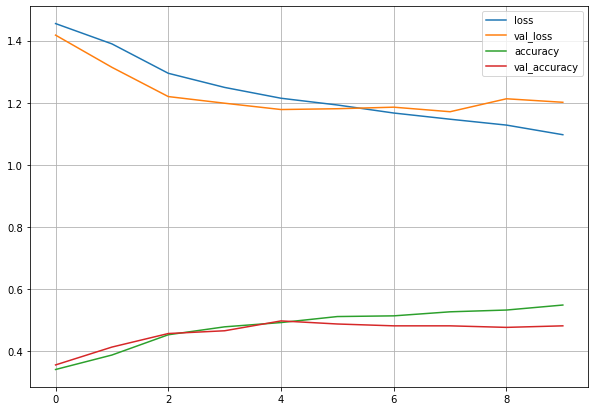

In [ ]:
plot_target = ['loss','val_loss','accuracy','val_accuracy']
plt.figure(figsize=(10,7))
for each in plot_target:
    plt.plot(history5.history[each],label=each)

plt.legend()
plt.grid()
plt.show()

32/32 [==============================] - 1s 26ms/step


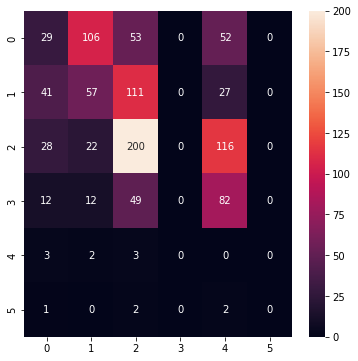

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(6,6))
predicted_val = model4.predict(X_test)
cm = confusion_matrix(y_test, np.argmax(predicted_val, axis=-1))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

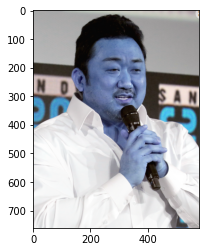

1/1 [==============================] - 0s 21ms/step
예상 정답 :  둥근형


In [ ]:
import cv2
img = cv2.imread("/content/캡처.PNG")
plt.imshow(img)
plt.show()
img = cv2.resize(img,(130,180))
img = np.reshape(img,[1,130,180,3])
classes = model4.predict(img)
z = (np.argmax(classes))
print('예상 정답 : ',CLASS[z])

## 이미지 확인

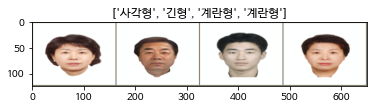

In [ ]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# 학습 데이터를 배치 단위로 불러오기
iterator = iter(train_dataloader)

# 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화  ---> 이미지 랜덤으로 가져옴
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

## 학습할 ResNet 딥러닝 모델 객체를 초기화

In [ ]:
model = models.resnet34(pretrained=True)
num_features = model.fc.in_features
# 전이 학습(transfer learning): 모델의 출력 뉴런 수를 6개로 교체하여 마지막 레이어 다시 학습
model.fc = nn.Linear(num_features, 6)  #피쳐수
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

#### 학습 진행 // 시간 오래걸린다. 약 3시간정도

In [ ]:
num_epochs = 8   # 에폭 8 설정,  10은 런타임 아웃
model.train()
start_time = time.time()

# 전체 반복(epoch) 수 만큼 반복하며
for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0

    # 배치 단위로 학습 데이터 불러오기
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 모델에 입력(forward)하고 결과 계산
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # 역전파를 통해 기울기(gradient) 계산 및 학습 진행
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)
    epoch_acc = running_corrects / len(train_datasets) * 100.

    # 학습 과정 중에 결과 출력
    print('#{} Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

#0 Loss: 1.4913 Acc: 38.4463% Time: 2231.6115s
#1 Loss: 1.3242 Acc: 44.3192% Time: 4465.4444s
#2 Loss: 1.2617 Acc: 47.0326% Time: 6698.0385s
#3 Loss: 1.2265 Acc: 48.8787% Time: 8915.3252s
#4 Loss: 1.1890 Acc: 51.1337% Time: 11136.4685s
#5 Loss: 1.1617 Acc: 52.8187% Time: 13380.8013s
#6 Loss: 1.1342 Acc: 53.7976% Time: 15603.0507s
#7 Loss: 1.1202 Acc: 54.1816% Time: 17849.0988s


## 학습된 모델 평가

In [ ]:
model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    # 갯수지정이 되지 않아서 도중에 실행중지 시켜줄 필요 있음 [:6] 적용안됨
    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))

## 분류 모델 적용

In [ ]:
# 테스트용 이미지 다운로드하기
!wget https://upload.wikimedia.org/wikipedia/commons/f/f1/Don_Lee_by_Gage_Skidmore.jpg -O test_image.jpg

--2023-02-17 08:09:48--  https://upload.wikimedia.org/wikipedia/commons/f/f1/Don_Lee_by_Gage_Skidmore.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4070584 (3.9M) [image/jpeg]
Saving to: ‘test_image.jpg’

test_image.jpg      100%[===================>]   3.88M  22.2MB/s    in 0.2s    

2023-02-17 08:09:48 (22.2 MB/s) - ‘test_image.jpg’ saved [4070584/4070584]



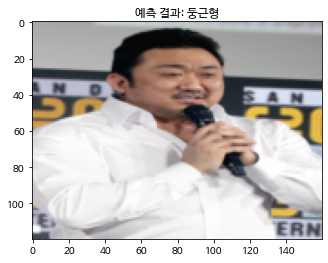

In [ ]:
from PIL import Image


image = Image.open('test_image.jpg')
image = transforms_test(image).unsqueeze(0).to(device)

with torch.no_grad():
    outputs = model(image)
    _, preds = torch.max(outputs, 1)
    imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

In [ ]:
# 각 항목별 정확도 및 컨퓨전 매트릭스 
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 
nb_classes = 6

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(test_dataloader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1


print('    계란형', '    긴형', '   둥근형', ' 마름모형', ' 사각형', '역삼각형')
print(confusion_matrix.diag()/confusion_matrix.sum(1))

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


    계란형     긴형    둥근형  마름모형  사각형 역삼각형
tensor([0.5339, 0.4458, 0.7514, 0.0000, 0.3161, 0.0000])


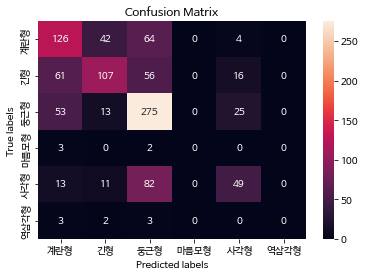

In [ ]:
# 컨퓨전 매트릭스 heatmap 그리기
import seaborn as sns

ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['계란형', '긴형', '둥근형', '마름모형', '사각형', '역삼각형']); ax.yaxis.set_ticklabels(['계란형', '긴형', '둥근형', '마름모형', '사각형', '역삼각형']);